In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/application_train.csv')
test  = pd.read_csv('data/application_test.csv')

In [3]:
train.dtypes#.value_counts()

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [4]:
# Description
des = pd.read_csv('data/HomeCredit_columns_description.csv')

### Variables types

In [5]:
print('Number of different types are:\n',train.dtypes.value_counts(),'\n')
print('Number of variables with object type:\n',train.select_dtypes('object').apply(pd.Series.nunique, axis = 0))

Number of different types are:
 float64    65
int64      41
object     16
dtype: int64 

Number of variables with object type:
 NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64


In [4]:
index_float  = train.columns[train.dtypes == 'float64']
index_int    = train.columns[train.dtypes == 'int64'  ]
index_object = train.columns[train.dtypes == 'object' ]

### Plot the graphs of every variable

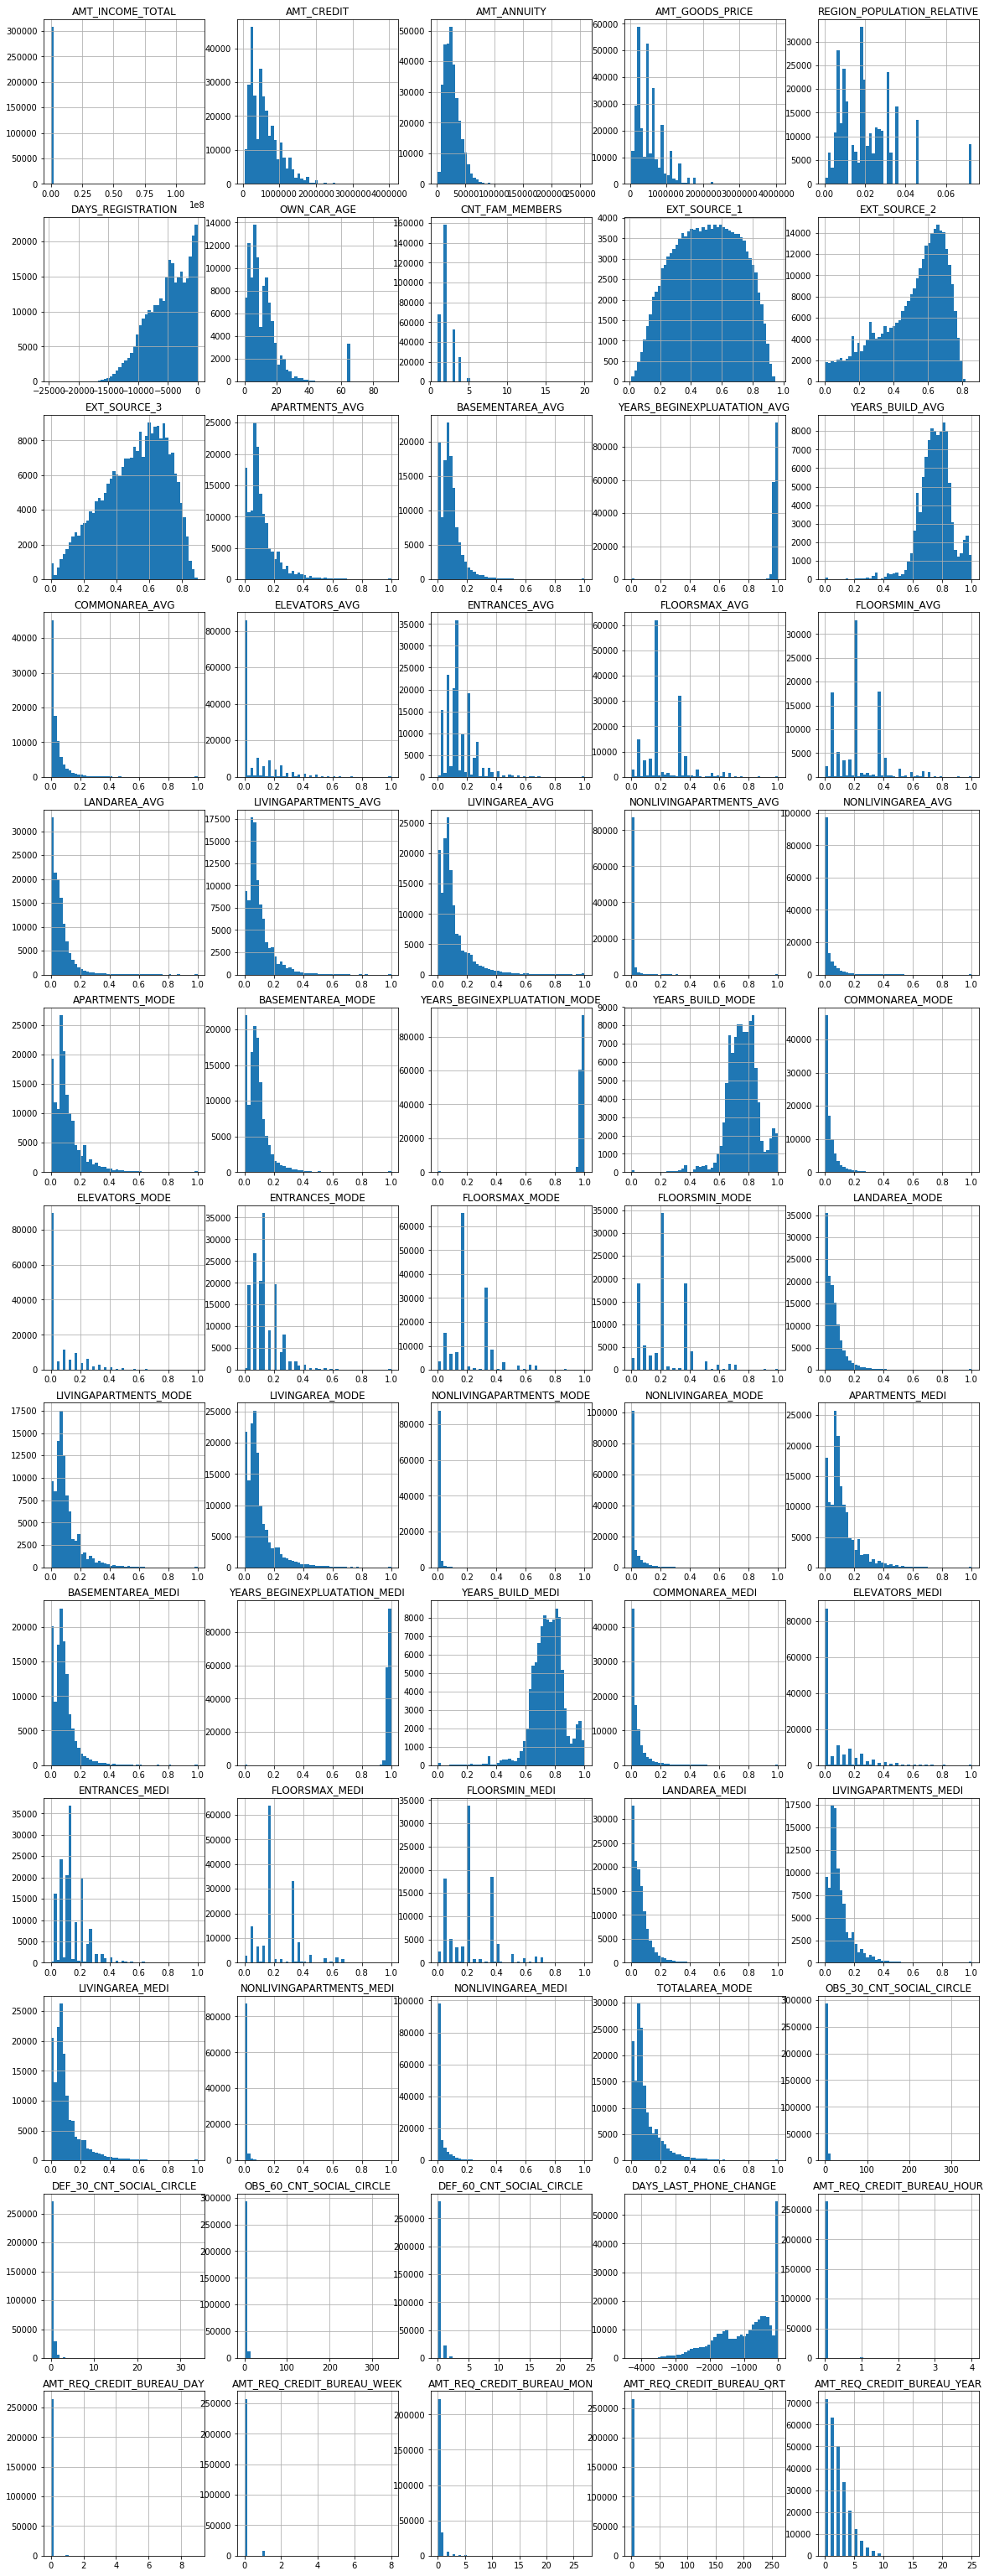

In [7]:
fig = plt.figure(figsize = (20,60))

t = 1
for i in index_float:
    ax = fig.add_subplot(14,5,t)
    train[i].hist(grid = True, bins = 50)
    plt.title('%s'%i)
    
    t = t+1
plt.legend()
    
plt.show()

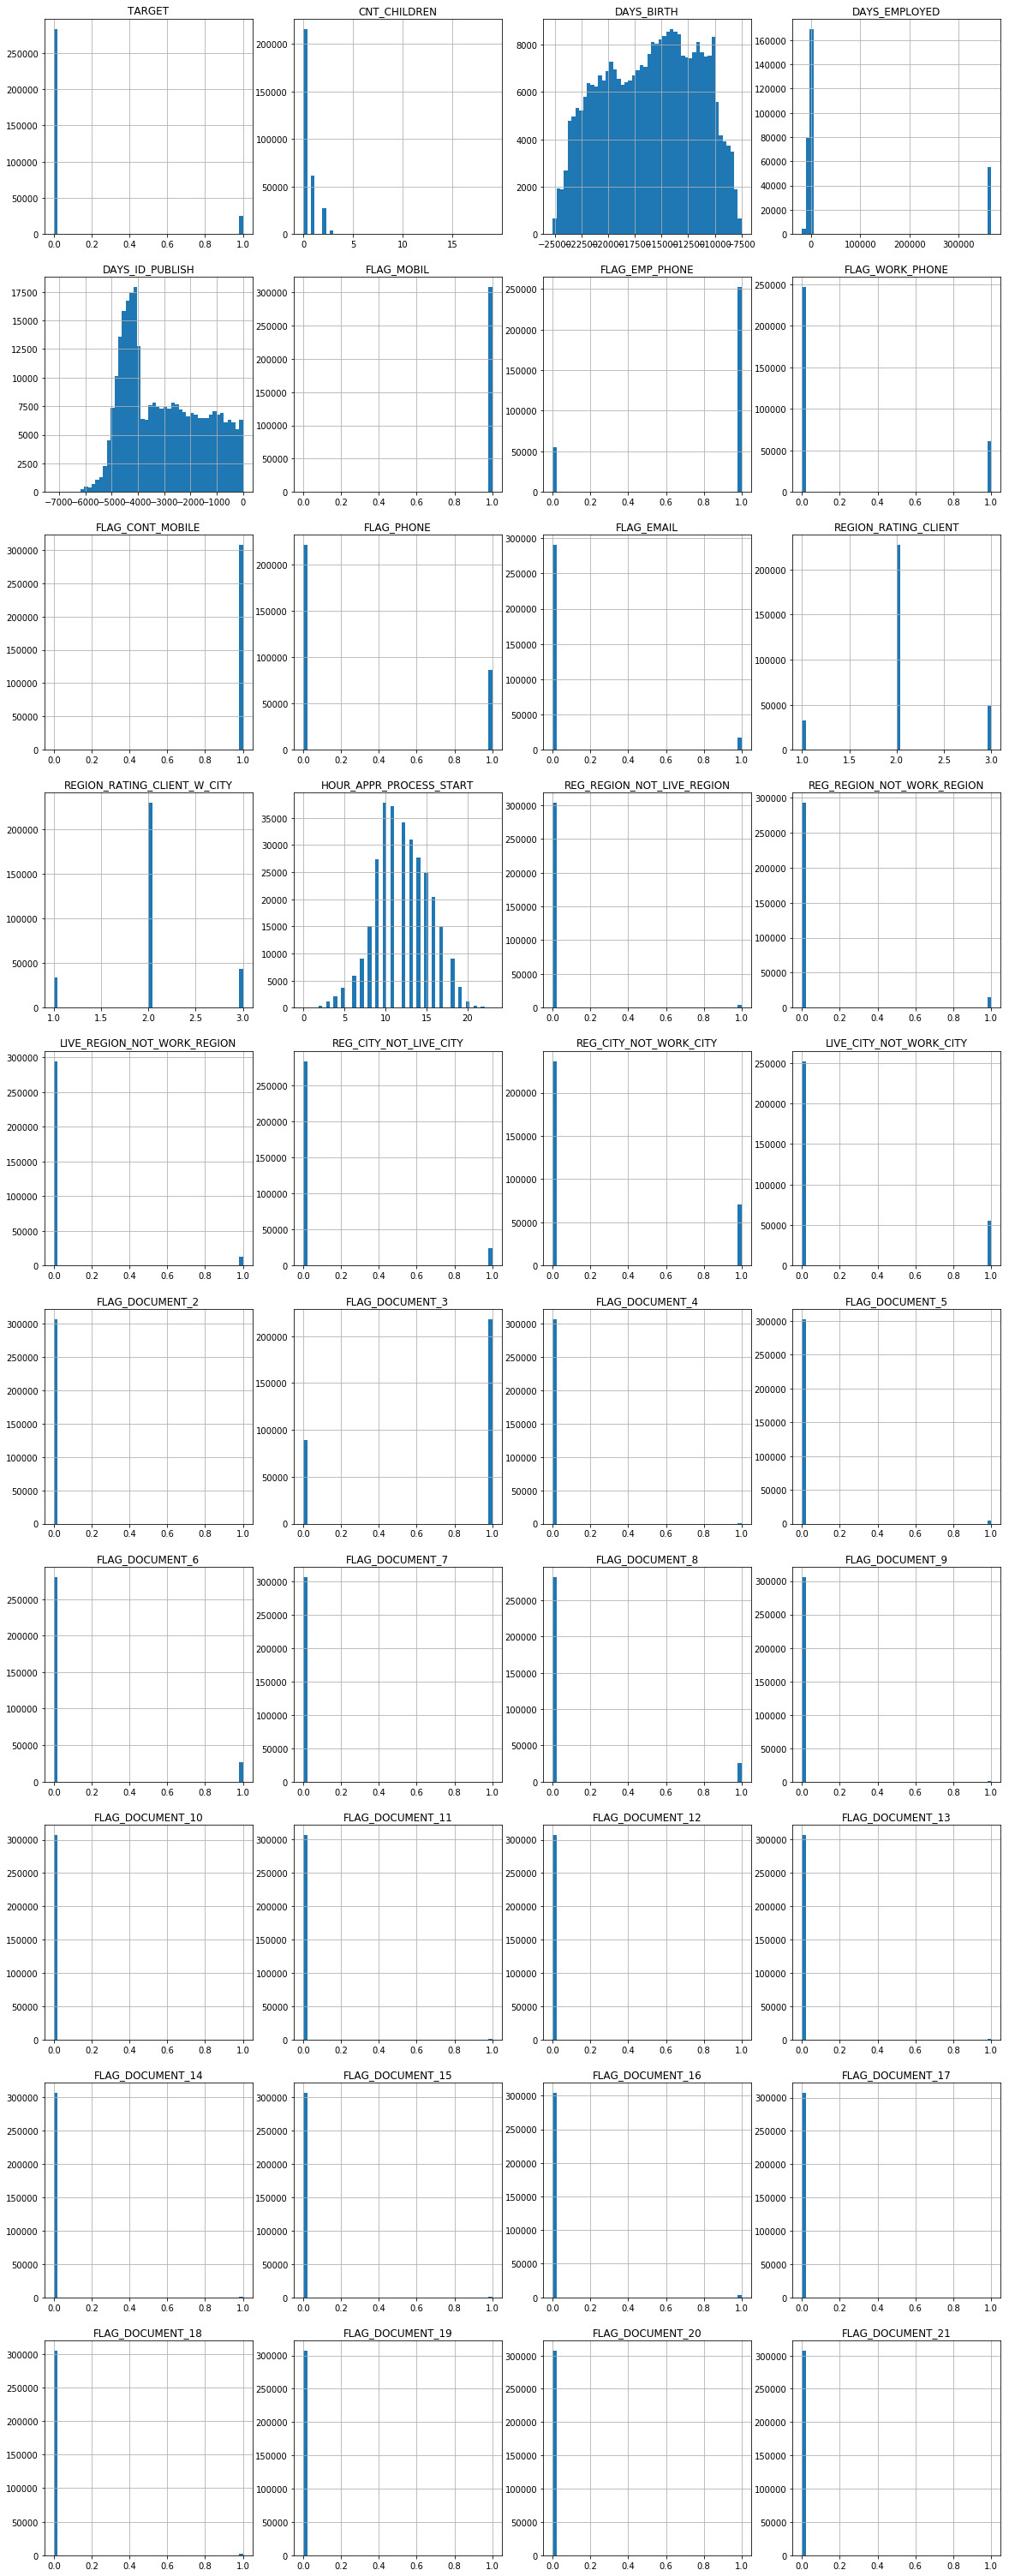

In [8]:
fig = plt.figure(figsize = (20,60))

t = 1
for i in index_int[1:]:
    ax = fig.add_subplot(11,4,t)
    train[i].hist(grid = True, bins = 50)
    plt.title('%s'%i)
    
    t = t+1
plt.legend()
    
plt.show()

From the graph above, we can observe that some histograms are abnormal.

We need to check out these graphs and adjust them.

#### The features which contain anomalies

In [5]:
# AMT_INCOME_TOTAL The number is too large, I think that it is arised by the input error. 
# I remove the last zero of the number, and the amount becomes plausiable
train.loc[train.AMT_INCOME_TOTAL == train.AMT_INCOME_TOTAL.max(),'AMT_INCOME_TOTAL'] = 117000

#### The features which contain negative and extreme large numbers

In [6]:
# DAYS_REGISTRATION, DAYS_LAST_PHONE_CHANGE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH
train.loc[train.DAYS_EMPLOYED == 365243,'DAYS_EMPLOYED'] = np.nan
#train.loc[train.DAYS_EMPLOYED < 0,'DAYS_EMPLOYED'] = abs(train.loc[train.DAYS_EMPLOYED < 0,'DAYS_EMPLOYED'])
test.loc[test.DAYS_EMPLOYED == 365243,'DAYS_EMPLOYED'] = np.nan
#test.loc[test.DAYS_EMPLOYED < 0,'DAYS_EMPLOYED'] = abs(test.loc[test.DAYS_EMPLOYED < 0,'DAYS_EMPLOYED'])

#train.loc[train.DAYS_REGISTRATION < 0,'DAYS_REGISTRATION'] = abs(train.loc[train.DAYS_REGISTRATION < 0,'DAYS_EMPLOYED'])
#test.loc[test.DAYS_REGISTRATION < 0,'DAYS_REGISTRATION'] = abs(test.loc[test.DAYS_REGISTRATION < 0,'DAYS_EMPLOYED'])

#train.loc[train.DAYS_LAST_PHONE_CHANGE < 0,'DAYS_LAST_PHONE_CHANGE'] = abs(train.loc[train.DAYS_LAST_PHONE_CHANGE < 0,'DAYS_LAST_PHONE_CHANGE'])
#test.loc[test.DAYS_LAST_PHONE_CHANGE < 0,'DAYS_LAST_PHONE_CHANGE'] = abs(test.loc[test.DAYS_LAST_PHONE_CHANGE < 0,'DAYS_LAST_PHONE_CHANGE'])

#train.loc[train.DAYS_BIRTH < 0,'DAYS_BIRTH'] = abs(train.loc[train.DAYS_BIRTH < 0,'DAYS_BIRTH'])
#test.loc[test.DAYS_BIRTH < 0,'DAYS_BIRTH'] = abs(test.loc[test.DAYS_BIRTH < 0,'DAYS_BIRTH'])

#train.loc[train.DAYS_ID_PUBLISH < 0,'DAYS_ID_PUBLISH'] = abs(train.loc[train.DAYS_ID_PUBLISH < 0,'DAYS_ID_PUBLISH'])
#test.loc[test.DAYS_ID_PUBLISH < 0,'DAYS_ID_PUBLISH'] = abs(test.loc[test.DAYS_ID_PUBLISH < 0,'DAYS_ID_PUBLISH'])

### Missing values

In [7]:
num     = []
precent = []
for i in train.columns:
    num.append(sum(train[i].isnull()))
    precent.append(sum(train[i].isnull())/ train.shape[0])

In [8]:
num = pd.DataFrame(num,index = train.columns,columns = ['number'])
precent = pd.DataFrame(precent,index = train.columns, columns = ['precentage [%]'])*100
ML = pd.concat([num,precent],axis = 1)

In [9]:
ML_name = ML.sort_values(by =['number'],ascending = False)[ML['precentage [%]'] > 0].index

C:\Users\LI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [10]:
ind_float  = train[ML_name].select_dtypes('float64').columns
ind_object = train[ML_name].select_dtypes('object').columns
# How many types we have
train[ML_name].dtypes.value_counts()

float64    62
object      6
dtype: int64

In [11]:
from sklearn.preprocessing import MinMaxScaler,Imputer

imputer_median = Imputer(strategy = 'median')
imputer_mode   = Imputer(strategy = 'most_frequent')

train[ind_float] = imputer_median.fit_transform(train[ind_float])
test[ind_float]  = imputer_median.transform(test[ind_float])

In [12]:
for i in ind_object:
    train.loc[train[i] != train[i],i] = train[i].mode()[0]
    test.loc[test[i] != test[i],i] = test[i].mode()[0]


In [17]:
num     = []
precent = []
for i in train.columns:
    num.append(sum(train[i].isnull()))
    precent.append(sum(train[i].isnull())/ train.shape[0])
    
num = pd.DataFrame(num,index = train.columns,columns = ['number'])
precent = pd.DataFrame(precent,index = train.columns, columns = ['precentage [%]'])*100
ML = pd.concat([num,precent],axis = 1)

In [18]:
ML.sort_values(by =['number'],ascending = False)[:10]

,number,precentage [%]
SK_ID_CURR,0,0.0
OBS_30_CNT_SOCIAL_CIRCLE,0,0.0
WALLSMATERIAL_MODE,0,0.0
TOTALAREA_MODE,0,0.0
HOUSETYPE_MODE,0,0.0
FONDKAPREMONT_MODE,0,0.0
NONLIVINGAREA_MEDI,0,0.0
NONLIVINGAPARTMENTS_MEDI,0,0.0
LIVINGAREA_MEDI,0,0.0
LIVINGAPARTMENTS_MEDI,0,0.0


### Find the correlation coefficients

In [19]:
correlations = train.corr()['TARGET']

In [20]:
correlations.sort_values()

EXT_SOURCE_2                  -0.160295
EXT_SOURCE_3                  -0.155892
EXT_SOURCE_1                  -0.098887
AMT_GOODS_PRICE               -0.039623
FLOORSMAX_AVG                 -0.039385
FLOORSMAX_MEDI                -0.039157
FLOORSMAX_MODE                -0.038377
REGION_POPULATION_RELATIVE    -0.037227
ELEVATORS_AVG                 -0.035853
ELEVATORS_MEDI                -0.035552
ELEVATORS_MODE                -0.034220
AMT_CREDIT                    -0.030369
TOTALAREA_MODE                -0.030214
LIVINGAREA_AVG                -0.029464
LIVINGAREA_MEDI               -0.029359
FLAG_DOCUMENT_6               -0.028602
LIVINGAREA_MODE               -0.027884
APARTMENTS_MEDI               -0.026841
APARTMENTS_AVG                -0.026734
APARTMENTS_MODE               -0.025418
HOUR_APPR_PROCESS_START       -0.024166
FLAG_PHONE                    -0.023806
FLOORSMIN_AVG                 -0.021158
FLOORSMIN_MEDI                -0.020995
AMT_INCOME_TOTAL              -0.020465


### Encoding Features

In [13]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [14]:
print(train.shape,test.shape)

(307511, 246) (48744, 242)


In [15]:
# make sure that the number of variables in train and test are same
# save TARGET 
train_tar = train['TARGET']
train ,test = train.align(test,join = 'inner',axis = 1)

In [16]:
train['TARGET'] = train_tar
print(train.shape,test.shape)

(307511, 243) (48744, 242)


### Filling missing value (skip)

First, we pick up uncomplete features 
ind1 = ML[ML.iloc[:,1]!=0].index
print(ind1)

### Feature Engineering

#### 1. Polynomial Features

In [25]:
# Try to use Polynomial method to select features
poly_features_train = train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','TARGET']]
poly_features_test  =  test[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]

In [26]:
# use 'imputer' for handling missing values
poly_target = poly_features_train['TARGET']

poly_features_train = poly_features_train.drop(columns = ['TARGET'])

poly_features_train = imputer_median.fit_transform(poly_features_train)
poly_features_test  = imputer_median.transform(poly_features_train)

In [27]:
# create the polynomial object with three degree
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree = 3)

poly_transformer.fit(poly_features_train)

poly_features_train = poly_transformer.transform(poly_features_train)
poly_features_test  = poly_transformer.transform(poly_features_test )

In [28]:
# Put features into dataframe
poly_features_train = pd.DataFrame(poly_features_train, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))
poly_features_test = pd.DataFrame(poly_features_test, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))
poly_features_train['TARGET'] = train_tar

In [29]:
# Merge polynomial features into train and test sets
poly_features_train['SK_ID_CURR'] = train['SK_ID_CURR']
poly_features_test ['SK_ID_CURR'] = test ['SK_ID_CURR']
train_poly = train.merge(poly_features_train, on = 'SK_ID_CURR',how = 'left')
test_poly  =  test.merge(poly_features_test , on = 'SK_ID_CURR',how = 'left')

####  2. Domain Knowledge Features (refer a script by Aguiar)

In [30]:
train_domain = train.copy()
test_domain  = test.copy()

train_domain['CREDIT_INCOME_PERCENT' ] = train_domain['AMT_CREDIT'   ] / train_domain['AMT_INCOME_TOTAL']
train_domain['ANNUITY_INCOME_PERCENT'] = train_domain['AMT_ANNUITY'  ] / train_domain['AMT_INCOME_TOTAL']
train_domain['CREDIT_TERM'           ] = train_domain['AMT_ANNUITY'  ] / train_domain['AMT_CREDIT'      ]
train_domain['DAYS_EMPLOYED_PERCENT' ] = train_domain['DAYS_EMPLOYED'] / train_domain['DAYS_BIRTH'      ]

test_domain['CREDIT_INCOME_PERCENT' ]  = test_domain['AMT_CREDIT'   ]  / test_domain ['AMT_INCOME_TOTAL']
test_domain['ANNUITY_INCOME_PERCENT']  = test_domain['AMT_ANNUITY'  ]  / test_domain ['AMT_INCOME_TOTAL']
test_domain['CREDIT_TERM'           ]  = test_domain['AMT_ANNUITY'  ]  / test_domain ['AMT_CREDIT'      ]
test_domain['DAYS_EMPLOYED_PERCENT' ]  = test_domain['DAYS_EMPLOYED']  / test_domain ['DAYS_BIRTH'      ]

### Model

In [17]:
from sklearn import tree, ensemble, model_selection, metrics
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc
from sklearn.ensemble import RandomForestClassifier


C:\Users\LI\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Rescale the data

In [18]:
if 'TARGET' in train:
    train1 = train.drop(columns = ['TARGET'])
else:
    train1 = train.copy()
    
features = list(train1.columns)

scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(train1)
train1 = scaler.transform(train1)
test1  = scaler.transform(test)

#### Random Forest model

In [20]:
# Make the random forest classifier
def RF(train, test, target):

    train_set  = train
    test_set   = test
    target_set = target
    
    random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

    random_forest.fit(train_set, target_set)

    # Extract feature importances
    feature_importance_values = random_forest.feature_importances_
    feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

    # Make predictions on the test data
    predictions = random_forest.predict_proba(test_set)[:, 1]
    return predictions

In [21]:
# Make a submission dataframe
submit = test[['SK_ID_CURR']]
submit['TARGET'] = RF(train1,test1,train_tar)

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.1s finished
C:\Users\LI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Light GBM model

In [31]:

if 'TARGET' in train:
    train2 = train.drop(columns = ['TARGET'])
else:
    train2 = train.copy()
    
features = list(train2.columns)
train2 = np.array(train2)
test2 = np.array(test2)

In [32]:
# Create KFold object
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 50)

# Empty array for feature importances
feature_importance_values = np.zeros(len(features))
    
# Empty array for test predictions
test_predictions = np.zeros(test1.shape[0])
    
# Empty array for out of fold validation predictions
out_of_fold = np.zeros(train1.shape[0])

# Lists for recording validation and training scores
valid_scores = []
train_scores = []
cat_indices = []    

In [30]:
train2

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,0,202500.000,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,67500.000,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,...,0,0,0,0,0,1,0,0,1,0
3,100006,0,135000.000,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,...,0,0,0,0,0,1,0,0,1,0
4,100007,0,121500.000,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,...,0,0,0,0,0,1,0,0,1,0
5,100008,0,99000.000,490495.5,27517.5,454500.0,0.035792,-16941,-1588.0,-4970.0,...,0,0,0,0,0,1,0,0,1,0
6,100009,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130.0,-1213.0,...,0,0,0,0,0,1,0,0,1,0
7,100010,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,-18850,-449.0,-4597.0,...,0,0,0,0,0,1,0,0,1,0
8,100011,0,112500.000,1019610.0,33826.5,913500.0,0.018634,-20099,-1648.0,-7427.0,...,0,0,0,0,0,1,0,0,1,0
9,100012,0,135000.000,405000.0,20250.0,405000.0,0.019689,-14469,-2019.0,-14437.0,...,0,0,0,0,0,1,0,0,1,0


In [33]:
# Iterate through each fold

for train_indices, valid_indices in k_fold.split(train1):
        
    # Training data for the fold
    train_features, train_labels = train2[train_indices], train_tar[train_indices]
    # Validation data for the fold
    valid_features, valid_labels = train2[valid_indices], train_tar[valid_indices]
        
    # Create the model
    model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                class_weight = 'balanced', learning_rate = 0.05, 
                                reg_alpha = 0.1, reg_lambda = 0.1, 
                                subsample = 0.8, n_jobs = -1, random_state = 50)
        
    # Train the model
    model.fit(train2, train_tar, eval_metric = 'auc',
                eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                early_stopping_rounds = 100, verbose = 200)
        
    # Record the best iteration
    best_iteration = model.best_iteration_
        
    # Record the feature importances
    feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
    # Make predictions
    test_predictions += model.predict_proba(test2, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
    # Record the out of fold predictions
    out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
    # Record the best score
    valid_score = model.best_score_['valid']['auc']
    train_score = model.best_score_['train']['auc']
        
    valid_scores.append(valid_score)
    train_scores.append(train_score)
        
    # Clean up memory
    gc.enable()
    del model, train_features, valid_features
    gc.collect()

C:\Users\LI\Anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	valid's auc: 0.787192	valid's binary_logloss: 0.559858	train's auc: 0.790525	train's binary_logloss: 0.560304
[400]	valid's auc: 0.81323	valid's binary_logloss: 0.537581	train's auc: 0.816273	train's binary_logloss: 0.538083
[600]	valid's auc: 0.83482	valid's binary_logloss: 0.518047	train's auc: 0.837285	train's binary_logloss: 0.518661
[800]	valid's auc: 0.853543	valid's binary_logloss: 0.500166	train's auc: 0.855079	train's binary_logloss: 0.500919
[1000]	valid's auc: 0.869144	valid's binary_logloss: 0.483864	train's auc: 0.870675	train's binary_logloss: 0.484523
[1200]	valid's auc: 0.883153	valid's binary_logloss: 0.46823	train's auc: 0.88437	train's binary_logloss: 0.469012
[1400]	valid's auc: 0.895478	valid's binary_logloss: 0.453414	train's auc: 0.896524	train's binary_logloss: 0.454307
[1600]	valid's auc: 0.905547	valid's binary_logloss: 0.440275	train's auc: 0.906922	train's binary_logloss: 0.440827
[1800]	val

C:\Users\LI\Anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	valid's auc: 0.78862	valid's binary_logloss: 0.560576	train's auc: 0.790184	train's binary_logloss: 0.560124
[400]	valid's auc: 0.814844	valid's binary_logloss: 0.538345	train's auc: 0.815886	train's binary_logloss: 0.537892
[600]	valid's auc: 0.836362	valid's binary_logloss: 0.518845	train's auc: 0.836921	train's binary_logloss: 0.518462
[800]	valid's auc: 0.854633	valid's binary_logloss: 0.500943	train's auc: 0.854821	train's binary_logloss: 0.500725
[1000]	valid's auc: 0.870685	valid's binary_logloss: 0.484394	train's auc: 0.8703	train's binary_logloss: 0.484391
[1200]	valid's auc: 0.884475	valid's binary_logloss: 0.468726	train's auc: 0.884046	train's binary_logloss: 0.468889
[1400]	valid's auc: 0.896807	valid's binary_logloss: 0.453982	train's auc: 0.896196	train's binary_logloss: 0.454165
[1600]	valid's auc: 0.907369	valid's binary_logloss: 0.440393	train's auc: 0.90647	train's binary_logloss: 0.440798
[1800]	val

C:\Users\LI\Anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	valid's auc: 0.793526	valid's binary_logloss: 0.56025	train's auc: 0.788952	train's binary_logloss: 0.560206
[400]	valid's auc: 0.818715	valid's binary_logloss: 0.537797	train's auc: 0.814911	train's binary_logloss: 0.538029
[600]	valid's auc: 0.838913	valid's binary_logloss: 0.518479	train's auc: 0.836274	train's binary_logloss: 0.518553
[800]	valid's auc: 0.856367	valid's binary_logloss: 0.50077	train's auc: 0.854384	train's binary_logloss: 0.500768
[1000]	valid's auc: 0.87155	valid's binary_logloss: 0.484648	train's auc: 0.870081	train's binary_logloss: 0.484327
[1200]	valid's auc: 0.88518	valid's binary_logloss: 0.469287	train's auc: 0.883868	train's binary_logloss: 0.468748
[1400]	valid's auc: 0.897308	valid's binary_logloss: 0.454574	train's auc: 0.896069	train's binary_logloss: 0.454017
[1600]	valid's auc: 0.907576	valid's binary_logloss: 0.441144	train's auc: 0.906416	train's binary_logloss: 0.44061
[1800]	vali

C:\Users\LI\Anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	valid's auc: 0.789594	valid's binary_logloss: 0.559402	train's auc: 0.789938	train's binary_logloss: 0.560418
[400]	valid's auc: 0.815105	valid's binary_logloss: 0.537113	train's auc: 0.81582	train's binary_logloss: 0.5382
[600]	valid's auc: 0.836428	valid's binary_logloss: 0.517521	train's auc: 0.836898	train's binary_logloss: 0.518793
[800]	valid's auc: 0.854026	valid's binary_logloss: 0.499878	train's auc: 0.854967	train's binary_logloss: 0.500992
[1000]	valid's auc: 0.869279	valid's binary_logloss: 0.483608	train's auc: 0.870646	train's binary_logloss: 0.484587
[1200]	valid's auc: 0.88268	valid's binary_logloss: 0.468176	train's auc: 0.884488	train's binary_logloss: 0.469026
[1400]	valid's auc: 0.894708	valid's binary_logloss: 0.453531	train's auc: 0.896717	train's binary_logloss: 0.454278
[1600]	valid's auc: 0.905135	valid's binary_logloss: 0.440053	train's auc: 0.907023	train's binary_logloss: 0.440883
[1800]	val

C:\Users\LI\Anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 100 rounds
[200]	valid's auc: 0.79033	valid's binary_logloss: 0.560987	train's auc: 0.78975	train's binary_logloss: 0.560021
[400]	valid's auc: 0.816413	valid's binary_logloss: 0.539078	train's auc: 0.815481	train's binary_logloss: 0.537709
[600]	valid's auc: 0.83743	valid's binary_logloss: 0.519801	train's auc: 0.836638	train's binary_logloss: 0.518223
[800]	valid's auc: 0.85528	valid's binary_logloss: 0.502086	train's auc: 0.854647	train's binary_logloss: 0.500439
[1000]	valid's auc: 0.871158	valid's binary_logloss: 0.485443	train's auc: 0.870169	train's binary_logloss: 0.484128
[1200]	valid's auc: 0.885111	valid's binary_logloss: 0.469862	train's auc: 0.883877	train's binary_logloss: 0.468605
[1400]	valid's auc: 0.897227	valid's binary_logloss: 0.455142	train's auc: 0.896083	train's binary_logloss: 0.453875
[1600]	valid's auc: 0.90758	valid's binary_logloss: 0.441719	train's auc: 0.906409	train's binary_logloss: 0.440466
[1800]	vali

In [ ]:
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
    
# Overall validation score
valid_auc = roc_auc_score(train_tar, out_of_fold)
    
# Add the overall scores to the metrics
valid_scores.append(valid_auc)
train_scores.append(np.mean(train_scores))
    
# Needed for creating dataframe of validation scores
fold_names = list(range(5))
fold_names.append('overall')
    
# Dataframe of validation scores
metrics = pd.DataFrame({'fold': fold_names,
                        'train': train_scores,
                        'valid': valid_scores}) 

In [34]:
# Make a submission file
submission = pd.DataFrame({'SK_ID_CURR': test['SK_ID_CURR'], 'TARGET': test_predictions})
submission.to_csv('baseline_lgb.csv', index = False)